# Stock market prediction and forecasting using stacked LSTM

In [2]:
pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Datacollection
import pandas_datareader as pdr #pandas_datareader is used to extract the data from the internet.It is popularly used for working with realtime stock price datasets

In [2]:
#Tiingo is a financial data platform that makes high quality financial tools available to all. Tiingo has a REST and Real-Time Data API, which this library helps you to access.
df=pdr.get_data_tiingo("TSLA",api_key='87e6d33ce6a8757cd85a6b9ef1a8de29fe638021')

In [3]:
df.to_csv('TSLA.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('TSLA.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2017-05-12 00:00:00+00:00,324.81,327.00,321.53,325.48,4114166,64.962,65.400,64.306,65.096,20570830,0.0,1.0
1,TSLA,2017-05-15 00:00:00+00:00,315.88,320.20,312.53,318.38,7568594,63.176,64.040,62.506,63.676,37842970,0.0,1.0
2,TSLA,2017-05-16 00:00:00+00:00,317.01,320.06,315.14,317.59,4121619,63.402,64.012,63.028,63.518,20608095,0.0,1.0
3,TSLA,2017-05-17 00:00:00+00:00,306.11,314.63,305.50,314.39,6675795,61.222,62.926,61.100,62.878,33378975,0.0,1.0
4,TSLA,2017-05-18 00:00:00+00:00,313.06,313.94,305.31,307.00,5590416,62.612,62.788,61.062,61.400,27952080,0.0,1.0


In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,TSLA,2022-05-04 00:00:00+00:00,952.62,955.50,885.280,903.94,27039655,952.62,955.50,885.280,903.94,27039655,0.0,1.0
1254,TSLA,2022-05-05 00:00:00+00:00,873.28,945.60,857.700,939.21,30839731,873.28,945.60,857.700,939.21,30839731,0.0,1.0
1255,TSLA,2022-05-06 00:00:00+00:00,865.65,888.00,843.105,887.00,24301037,865.65,888.00,843.105,887.00,24301037,0.0,1.0
1256,TSLA,2022-05-09 00:00:00+00:00,787.11,845.63,781.150,836.45,30270074,787.11,845.63,781.150,836.45,30270074,0.0,1.0
1257,TSLA,2022-05-10 00:00:00+00:00,800.04,825.36,774.250,819.31,28133877,800.04,825.36,774.250,819.31,28133877,0.0,1.0


In [7]:
df1=df.reset_index()['close'] #we are going to predict the stock price based on the close column

In [8]:
df1.shape

(1258,)

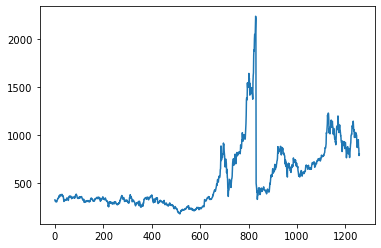

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

## LSTM are sensitive to scale of the data so we should apply minmax scaler

In [10]:
df1.shape

(1258,)

In [11]:
df1

0       324.81
1       315.88
2       317.01
3       306.11
4       313.06
         ...  
1253    952.62
1254    873.28
1255    865.65
1256    787.11
1257    800.04
Name: close, Length: 1258, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

<IPython.core.display.Javascript object>

In [13]:
df1

array([[0.07080368],
       [0.06646826],
       [0.06701687],
       ...,
       [0.33337541],
       [0.29524512],
       [0.30152249]])

In [14]:
df1.shape

(1258, 1)

In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
#splitting the data in to train and test
#in timeseries data we use timestamps for splitting the train and test set and for predictions
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]   ###i=0, 0,1,2,3-----99   100 
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [17]:
# reshape in to X=t,t+1,t+2,t+3 Y=t+4
time_step=100 #time_step is a hyperparameter
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
print(X_train)

[[0.07080368 0.06646826 0.06701687 ... 0.07871229 0.07892105 0.08213013]
 [0.06646826 0.06701687 0.06172504 ... 0.07892105 0.08213013 0.08546544]
 [0.06701687 0.06172504 0.06509919 ... 0.08213013 0.08546544 0.08562079]
 ...
 [0.17848994 0.12918855 0.12196934 ... 0.60772995 0.63406286 0.63503384]
 [0.12918855 0.12196934 0.08848032 ... 0.63406286 0.63503384 0.63407257]
 [0.12196934 0.08848032 0.12072649 ... 0.63503384 0.63407257 0.6362864 ]]


In [19]:
X_train.shape

(716, 100)

In [20]:
#before implementing any LSTM model we should reshape the X train in 3 dimensions
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# LSTM MODEL

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
9model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=-1)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [42]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

In [43]:
from sklearn.metrics import r2_score #r2=1-(sum of resudual/sum of mean) #where sum of mean>sum of residual #so we will get a small value #therefore 1- small value
score=r2_score(y_test,y_predict)  

In [44]:
##Transformback to original form to find the RMSE 
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [45]:
print(score)

0.9068623718517039


In [44]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

386.79239965817595

In [45]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

757.6556245932518

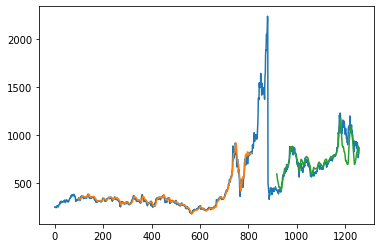

In [48]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [49]:
len(test_data)

441

In [50]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [51]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [52]:
temp_input

[0.2931283923525813,
 0.29840080008544595,
 0.2944586315043354,
 0.29759003388711414,
 0.30428006874520575,
 0.306882288399732,
 0.31039722688830845,
 0.32239365369117085,
 0.3355406888114264,
 0.33270543456097246,
 0.33344823233549203,
 0.34713901484624565,
 0.35475147831321785,
 0.41067007156104035,
 0.407548378953092,
 0.41698142520074943,
 0.4360028740933497,
 0.4539465379797841,
 0.4998689180397905,
 0.4821048849877171,
 0.5024274437075803,
 0.5102195380089135,
 0.5064230160502576,
 0.4777063569895813,
 0.41000980687257854,
 0.43158978143296856,
 0.4294342114206371,
 0.4148258551884182,
 0.40510151569585096,
 0.4251716202701259,
 0.44181417432929726,
 0.4453922263542708,
 0.46514190835914504,
 0.47475944032857864,
 0.4515336589344492,
 0.45491751546281634,
 0.4383720591519482,
 0.4651079241472389,
 0.4688801716688189,
 0.4447222518909786,
 0.43967316897921127,
 0.40586858790744634,
 0.4029750750080105,
 0.42372486382040797,
 0.43208012506189974,
 0.40044567866471165,
 0.4068686947

In [53]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.32487214]
101
1 day input [0.2984008  0.29445863 0.29759003 0.30428007 0.30688229 0.31039723
 0.32239365 0.33554069 0.33270543 0.33344823 0.34713901 0.35475148
 0.41067007 0.40754838 0.41698143 0.43600287 0.45394654 0.49986892
 0.48210488 0.50242744 0.51021954 0.50642302 0.47770636 0.41000981
 0.43158978 0.42943421 0.41482586 0.40510152 0.42517162 0.44181417
 0.44539223 0.46514191 0.47475944 0.45153366 0.45491752 0.43837206
 0.46510792 0.46888017 0.44472225 0.43967317 0.40586859 0.40297508
 0.42372486 0.43208013 0.40044568 0.40686869 0.38229325 0.37845789
 0.38694424 0.3631213  0.36586432 0.35002282 0.36875783 0.40290711
 0.43112857 0.44420763 0.44155201 0.4404451  0.4327501  0.42616687
 0.49559176 0.47122508 0.44138209 0.43001194 0.4116896  0.42681743
 0.4298663  0.45016944 0.41392285 0.42268592 0.41341308 0.39648895
 0.39678995 0.3713649  0.36461661 0.35898494 0.36821408 0.3156308
 0.32400548 0.36787909 0.36522347 0.35279981 0.34575052 0.36137354
 0.35361543 0.3607327  0.36558759 

In [54]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [55]:
import matplotlib.pyplot as plt

In [56]:
len(df1)

1258

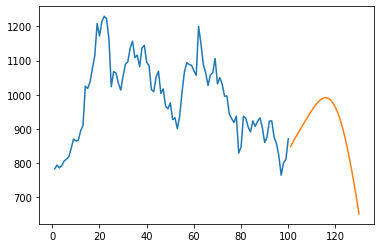

In [57]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

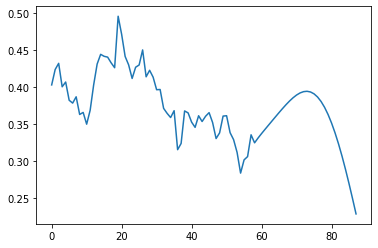

In [58]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [59]:
df3=scaler.inverse_transform(df3).tolist()

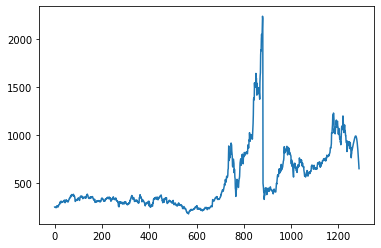

In [60]:
plt.plot(df3)